# Tensorflow v2 tutorial

## Mnist dataset introduction

Most examples are using MNIST dataset of handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flatten and converted to a 1-D numpy array of 784 features (28*28).

## Overview of mnist dataset

In [3]:
# Import mnist dataset using keras
import tensorflow as tf
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()


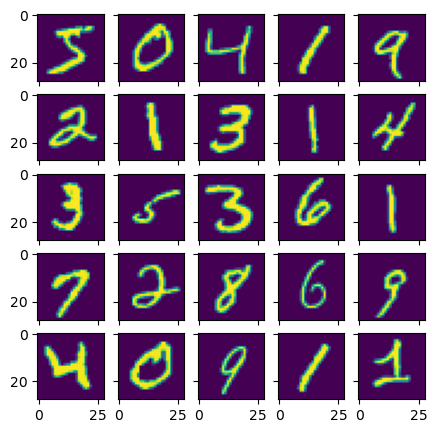

In [4]:
import matplotlib.pyplot as plt
SIZE_FIG = 5
fig, axs = plt.subplots(SIZE_FIG, SIZE_FIG, sharex=True, sharey=True)
fig.set_figwidth(SIZE_FIG)
fig.set_figheight(SIZE_FIG)
for i in range(0, SIZE_FIG):
    for j in range(0, SIZE_FIG):
        axs[i, j].imshow(x_train[i*SIZE_FIG+j])


In [5]:
%reset -f

## Hello world

In [6]:
import tensorflow as tf
# Following code creates a tensor
hello=tf.constant("hello world")
print(hello)

tf.Tensor(b'hello world', shape=(), dtype=string)


2023-04-20 13:36:26.258650: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-20 13:36:26.259418: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-20 13:36:26.265678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 13:36:26.265973: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2023-04-20 13:36:26.265989: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-20 13:36:26.267458: I tensorflow/stream_executor/platform/def

In [7]:
# To access a Tensor value call numpy()
print(hello.numpy())

b'hello world'


In [8]:
%reset -f

## Basic tensor operations

In [9]:
import tensorflow as tf

# Define tensor constants
a=tf.constant(2)
b=tf.constant(3)
c=tf.constant(5)

In [10]:
# Arithmetic operations in tensorflow api, result in a tensor
add=tf.add(a,b)
print(add)
sub=tf.subtract(a,b)
print(sub)
mul=tf.multiply(a,b)
print(mul)
div=tf.divide(a,b)
print(div)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(0.6666666666666666, shape=(), dtype=float64)


In [11]:
# Arithmetic operations in python api, result in a tensor
add=a+b
print(add)
sub=a-b
print(sub)
mul=a*b
print(mul)
div=a/b
print(div)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(0.6666666666666666, shape=(), dtype=float64)


In [12]:
# More arithmetic api
tf_mean=tf.reduce_mean([a,b,c])
print(tf_mean)
tf_max=tf.reduce_max([a,b,c])
print(tf_max)
tf_min=tf.reduce_min([a,b,c])
print(tf_min)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [13]:
%reset -f

## Linear regression

This example is using a low-level approach to better understand all mechanics behind the training process.

In [14]:
# Parameters
LEARNING_RATE=0.01
TRAINING_STEPS=1000
DISPLAY_STEP=200

In [15]:
# Create training data
import numpy as np
train_x = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
              7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
              2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])


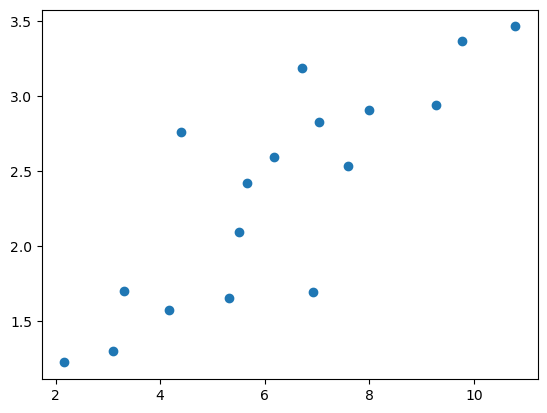

In [16]:
# Visualize training data
import matplotlib.pyplot as plt
fig,axs=plt.subplots()
axs.scatter(train_x,train_y)

In [17]:
import tensorflow as tf
weight=tf.Variable(np.random.randn(),name="weight")
bias=tf.Variable(np.random.randn(),name="bias")
print(weight)
print(bias)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=1.6209273>
<tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.39183965>


In [18]:
# Linear regression
def linear_regression(x,w,b):
    return w*x+b

In [19]:
# Mean square error
def mean_square(y_hat,y):
    return tf.reduce_mean(tf.square(y_hat-y))

In [20]:
# Stochastic gradient descent optimizer
optimizer=tf.optimizers.SGD(LEARNING_RATE)

In [21]:
# Optimization process
def run_optimization(x,y,w,b):
    with tf.GradientTape() as g:
        y_hat=linear_regression(x,w,b)
        cost=mean_square(y_hat,y)
    # Compute gradients
    gradients=g.gradient(cost,[w,b])
    # Update parameters
    optimizer.apply_gradients(zip(gradients,[w,b]))

In [22]:
# Run training for the given number of steps
for step in range(0,TRAINING_STEPS):
    run_optimization(train_x,train_y,weight,bias)
    if step%DISPLAY_STEP==0:
        y_hat=linear_regression(train_x,weight,bias)
        cost=mean_square(y_hat,train_y)
        print("step %d, cost %f, weight %f, bias %f" % (step,cost,weight,bias))
        

step 0, cost 0.910359, weight 0.458921, bias 0.229392
step 200, cost 0.169990, weight 0.302554, bias 0.437811
step 400, cost 0.159960, weight 0.282950, bias 0.576790
step 600, cost 0.156166, weight 0.270894, bias 0.662263
step 800, cost 0.154731, weight 0.263479, bias 0.714829


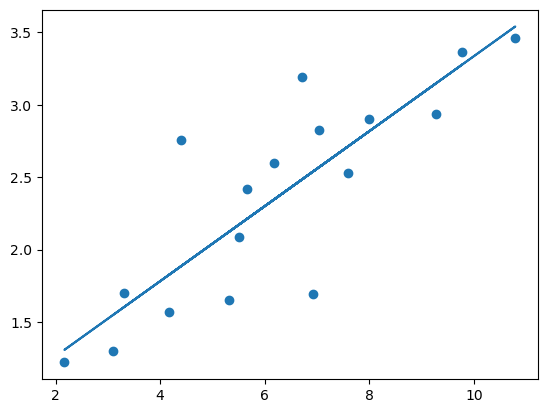

In [23]:
fig,axs=plt.subplots()
axs.scatter(train_x,train_y)
axs.plot(train_x,linear_regression(train_x,weight,bias).numpy())

In [24]:
%reset -f